In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import numpy as np
import annotate
import plot_utils

In [2]:
methods = {
    # 'n_1r1i': '1 dim\n1 answer',
    # 'n_3r1i': '3 dims\n1 answer',
    # 'n_1r10i': '1 dim\n10 answers',
    'n_1r20i': '1 dim, 20 answers',
    # 'n_1r50i': '1 dim\n50 answers',
    's_1r20i': '1 dim, 20 answers\n10 samples',
    'n_1r20i_numeric': '1 dim, 20 answers\nrating-only',
    's_1r20i_numeric': '1 dim, 20 answers\nrating-only, 10 samples',
}

In [3]:
plotted = ['n_1r20i', 's_1r20i', 's_1r20i_numeric']

In [4]:
source = pd.read_excel(f'gpt-ratings/n_1r1i.xlsx')

sources = {k: pd.read_excel(f'gpt-ratings/{k}.xlsx') for k in methods}

In [5]:
points = np.arange(1,101)
h0 = scipy.stats.gaussian_kde(source['novelty_transformed']).pdf(points)
for method, src in sources.items():
    h1 = scipy.stats.gaussian_kde(src['novelty']).pdf(points)
    print(f'{method}\t{scipy.special.rel_entr(h0, h1).sum():.2f}')

n_1r20i	0.54
s_1r20i	0.19
n_1r20i_numeric	0.26
s_1r20i_numeric	0.09


In [6]:
points = np.arange(1,101)
h0 = scipy.stats.gaussian_kde(source['feasibility_transformed']).pdf(points)
for method, src in sources.items():
    h1 = scipy.stats.gaussian_kde(src['feasibility']).pdf(points)
    print(f'{method}\t{scipy.special.rel_entr(h0, h1).sum():.2f}')

n_1r20i	0.80
s_1r20i	0.66
n_1r20i_numeric	0.87
s_1r20i_numeric	0.43


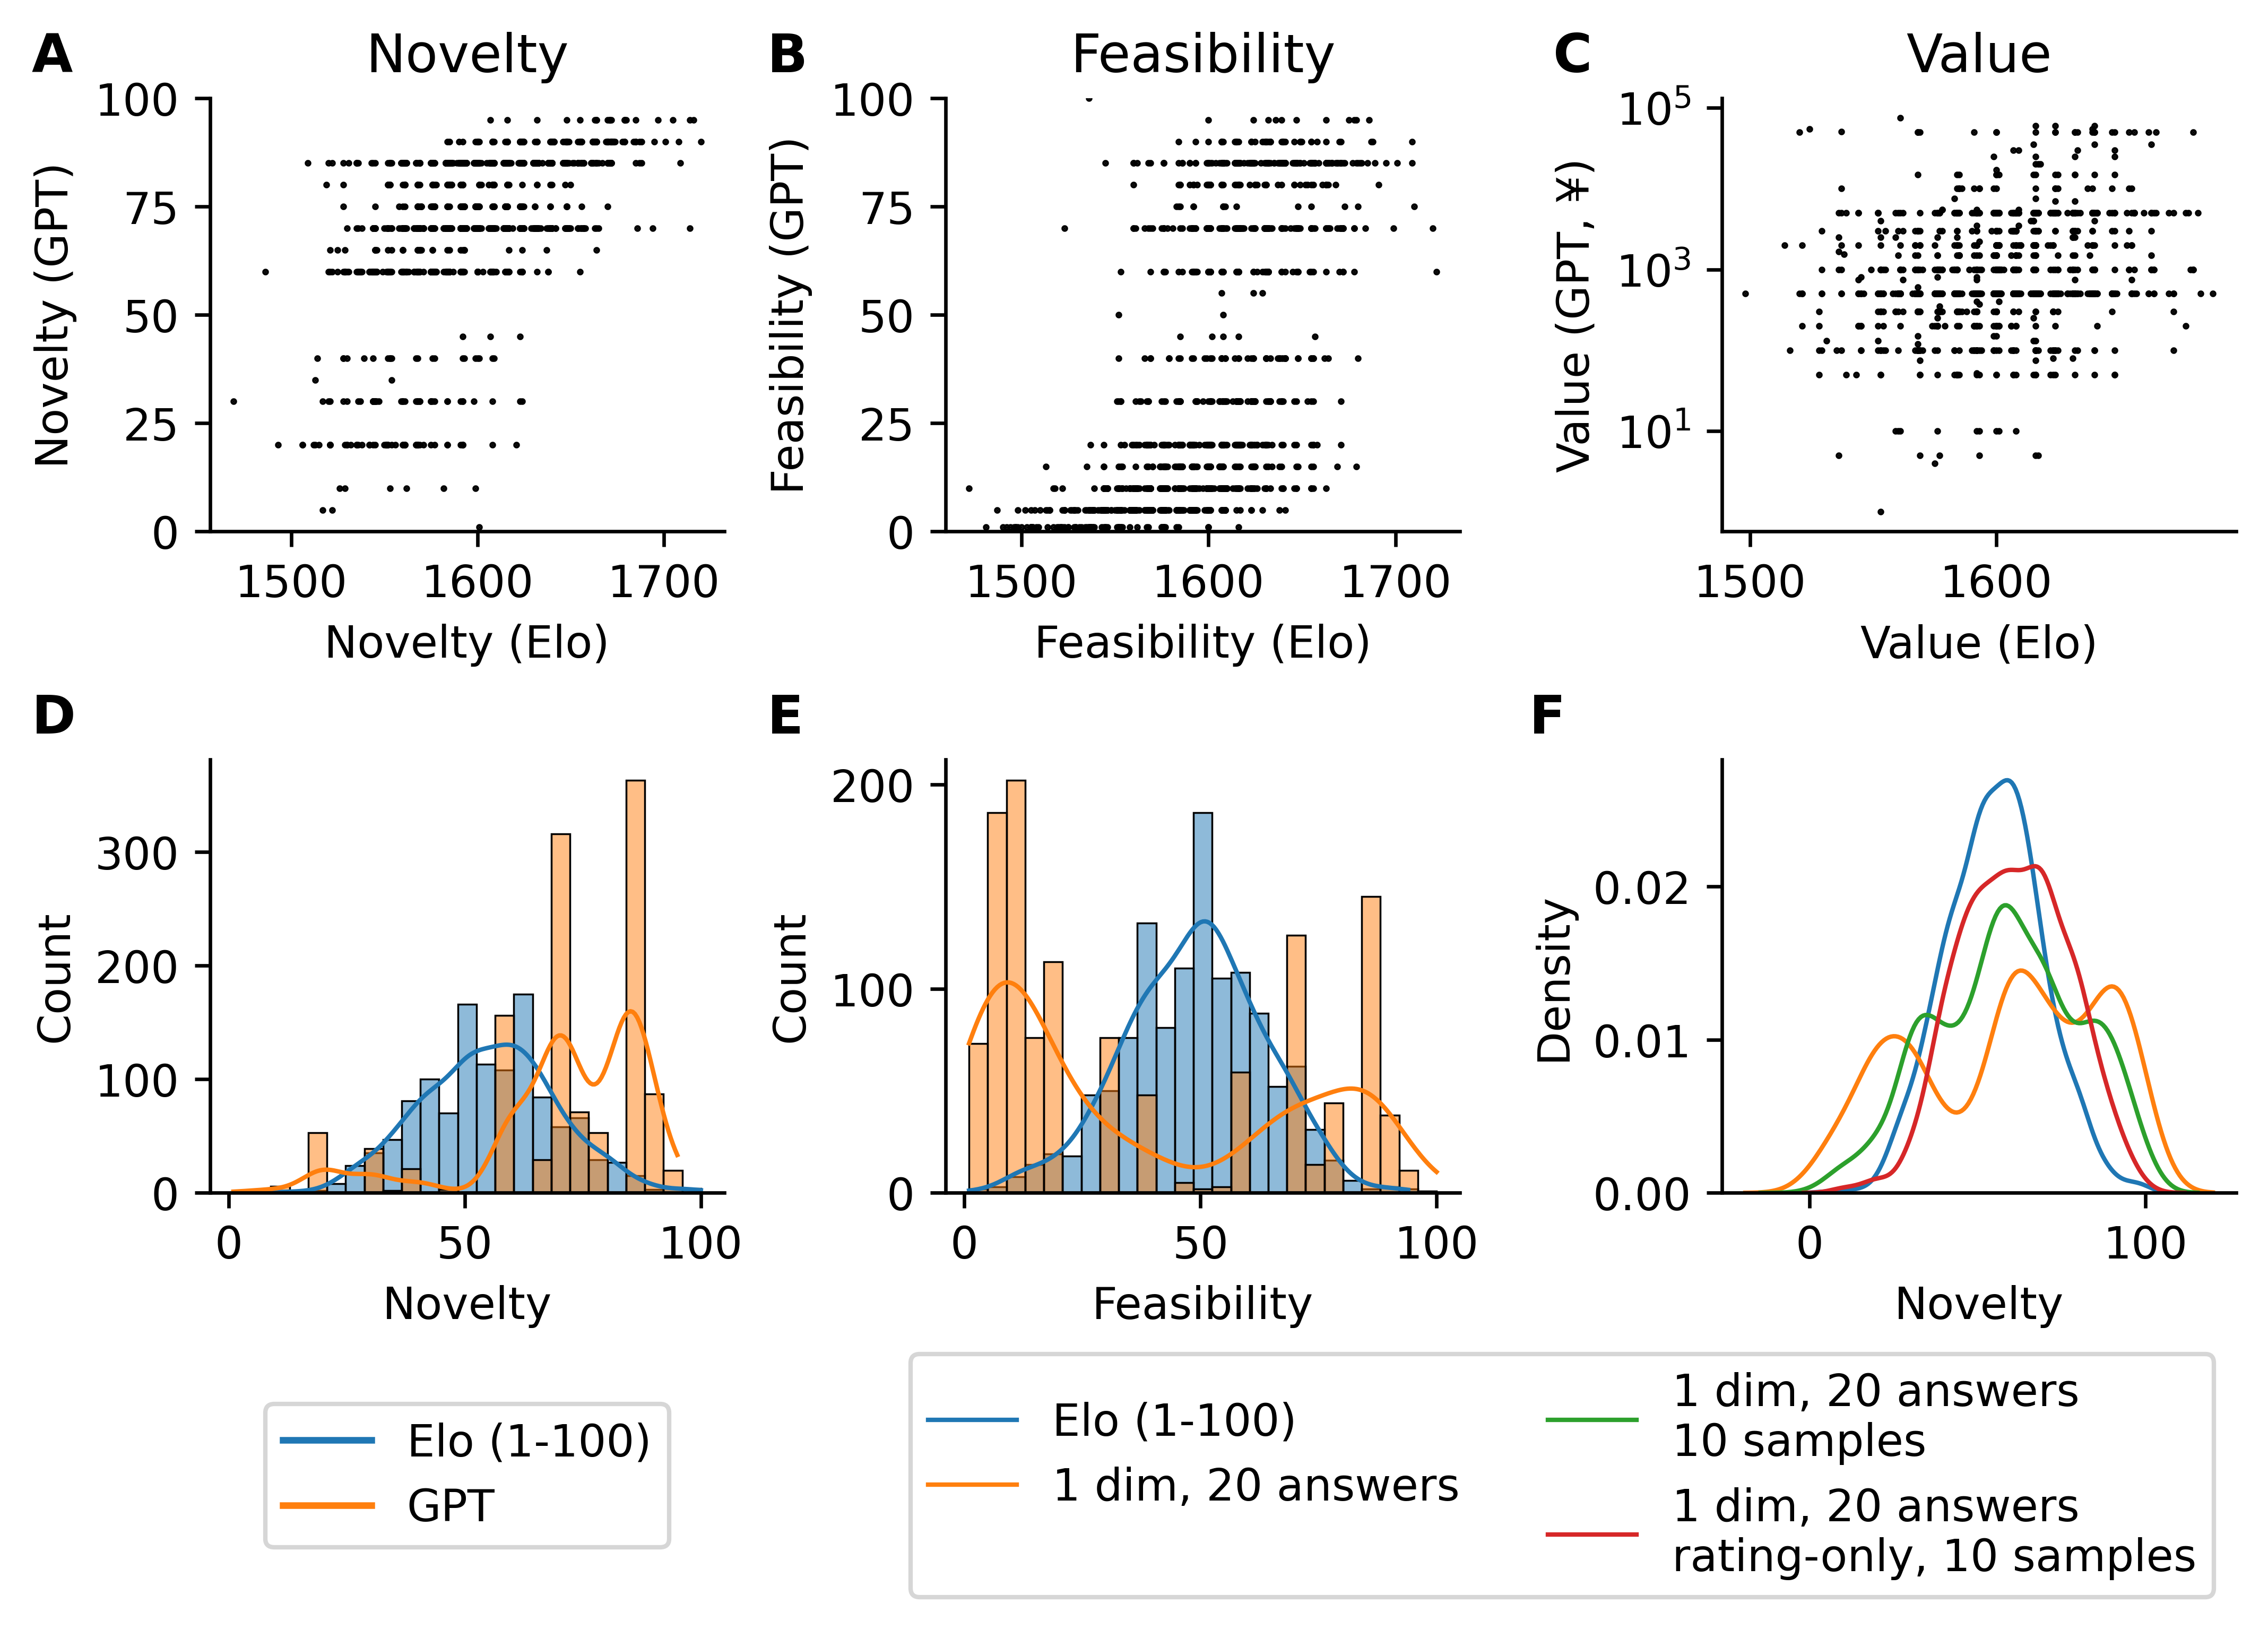

In [7]:
fig, axs = plt.subplots(3, 3, height_ratios=(2,2,1), figsize=(7,5), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (GPT{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[2,0].plot([], label='Elo (1-100)')
axs[2,0].plot([], label='GPT')
axs[2,0].legend(loc='center')

ax = axs[1,2]
sns.kdeplot(source, x=f'novelty_transformed', ax=ax, lw=1, label='Elo (1-100)')
for method in plotted:
    sns.kdeplot(sources[method], x='novelty', ax=ax, lw=1, label=methods[method])
ax.set_xlabel('Novelty')
ax.legend(ncol=2)
for c in ax.get_children():
    if isinstance(c, mpl.legend.Legend):
        thelegend = c
        c.set_visible(False)

gs = axs[2,1].get_gridspec()
for ax in axs[2, 1:]:
    ax.remove()
axbig = fig.add_subplot(gs[2, 1:])
axbig.legend(
    thelegend.legend_handles, [l.get_label() for l in thelegend.legend_handles],
    loc='center right', ncol=2)

sns.despine()
for ax in (axs[2,0], axbig):
    sns.despine(ax=ax, bottom=True, left=True)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate(axs[:2].flatten()):
    plot_utils.label_panel(ax, i)

plt.savefig(f'Figure_2.pdf')

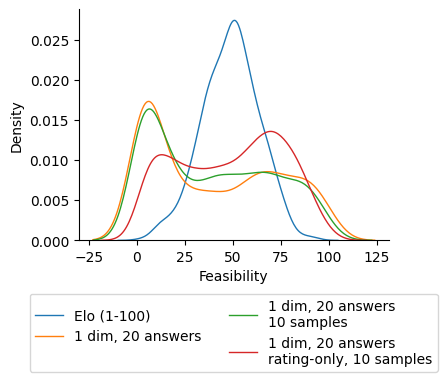

In [8]:
fig, ax = plt.subplots(figsize=(4,3))
sns.kdeplot(source, x=f'feasibility_transformed', ax=ax, lw=1, label='Elo (1-100)')
for method in plotted:
    sns.kdeplot(sources[method], x='feasibility', ax=ax, lw=1, label=methods[method])
ax.set_xlabel('Feasibility')
ax.legend(ncol=2, loc='center', bbox_to_anchor=(.5, -.4))
sns.despine()
plt.savefig('Figure_S1.pdf')